# Tasks/Activities List:
Your code should contain the following activities/Analysis:
Read the cars dataset
Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any
Transform the categorical data
Apply the Multiple Linear Regression model with and without regularizations (Ridge, Lasso and Elasticnet)
Print the model results
Get the feature importance
Compare all the models using the Sum of Squared Error metric

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Reading the cars dataset
df = pd .read_csv("C:/Users/Sheenu/Downloads/car data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 
The dataset comprises 301 entries with 9 columns, featuring a combination of numerical and categorical data. It includes information about various aspects of cars such as their names, manufacturing year, selling price, present price, kilometers driven, fuel type, seller type, transmission, and number of previous owners.

In [4]:
# fetching len of df
len(df)


301

In [5]:
# name of columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
# no of coloums 
len(df.columns)

9

In [7]:
# first five rows of dataset
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


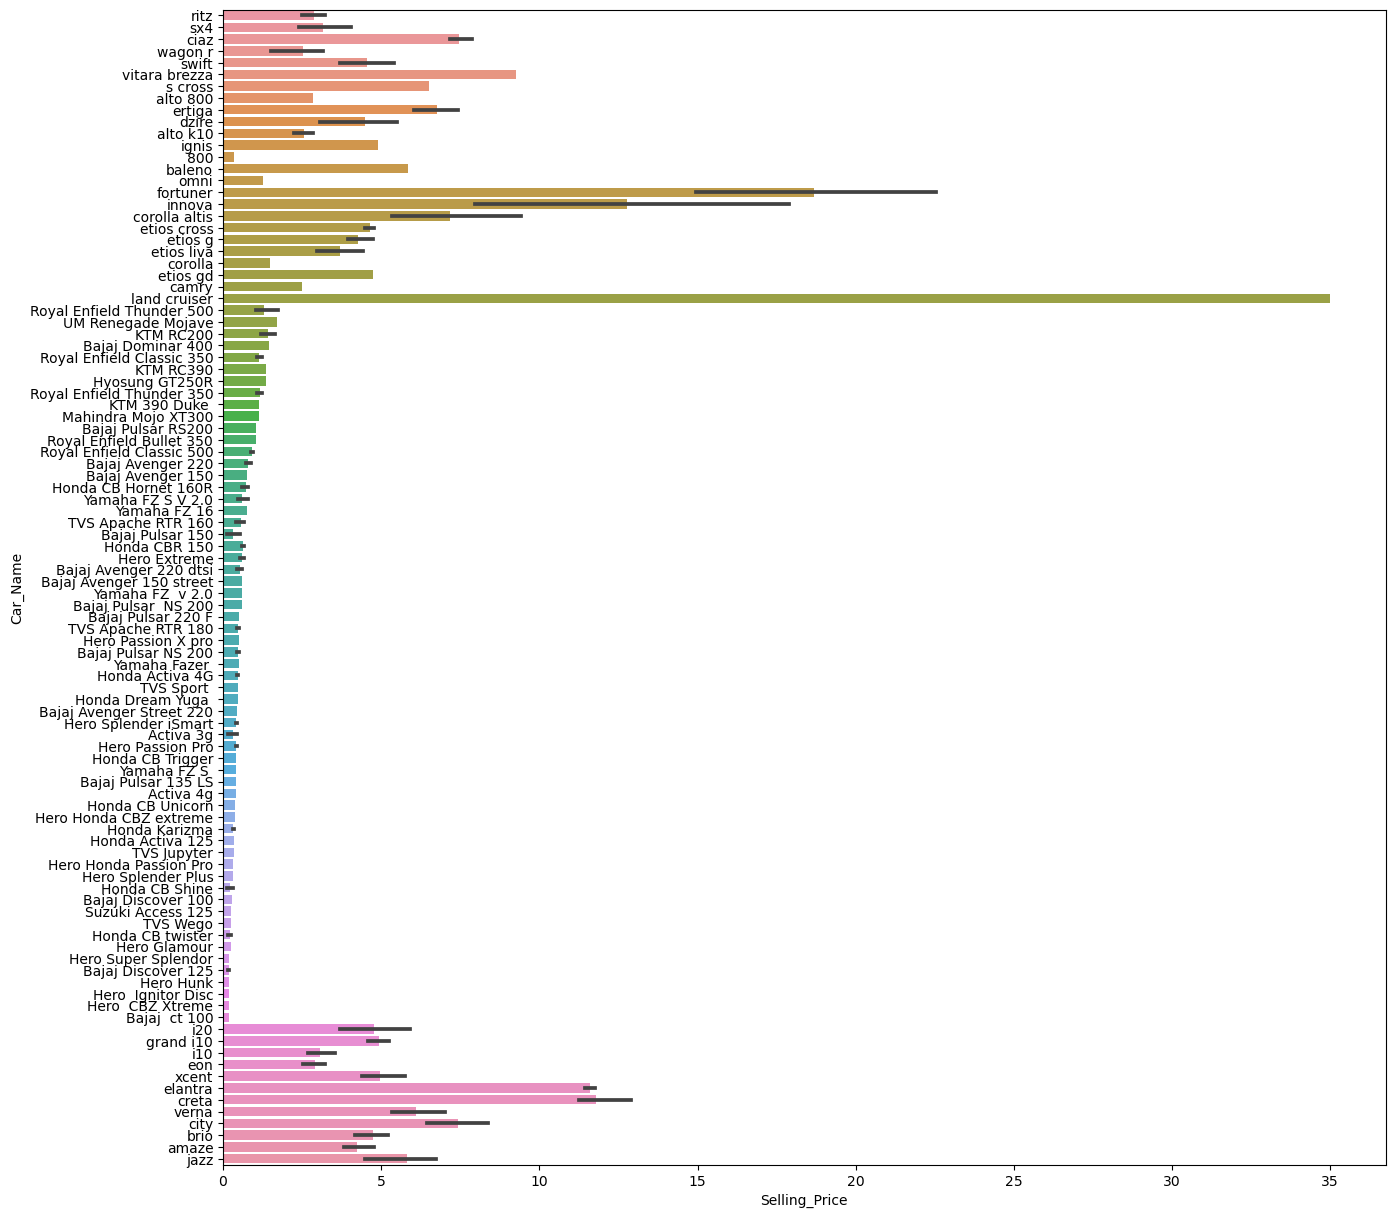

In [8]:

# EDA
plt.figure(figsize= (15,15))
sns.barplot(data= df, y= 'Car_Name', x = 'Selling_Price')
plt.show()

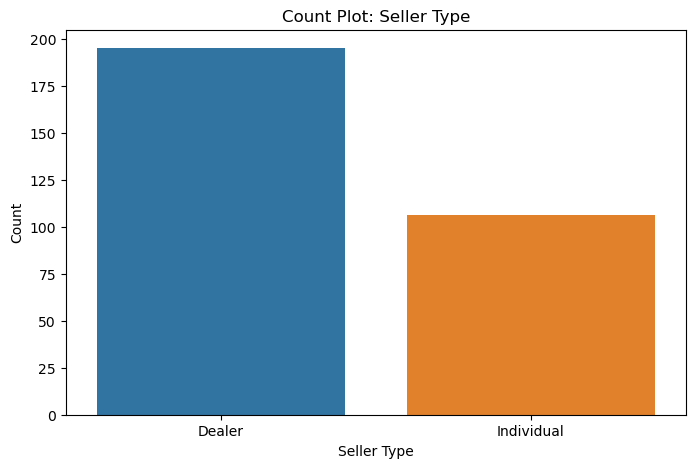

In [12]:
#EDA
plt.figure(figsize=(8, 5))
sns.countplot(x='Seller_Type', data=df)
plt.title('Count Plot: Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()



<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

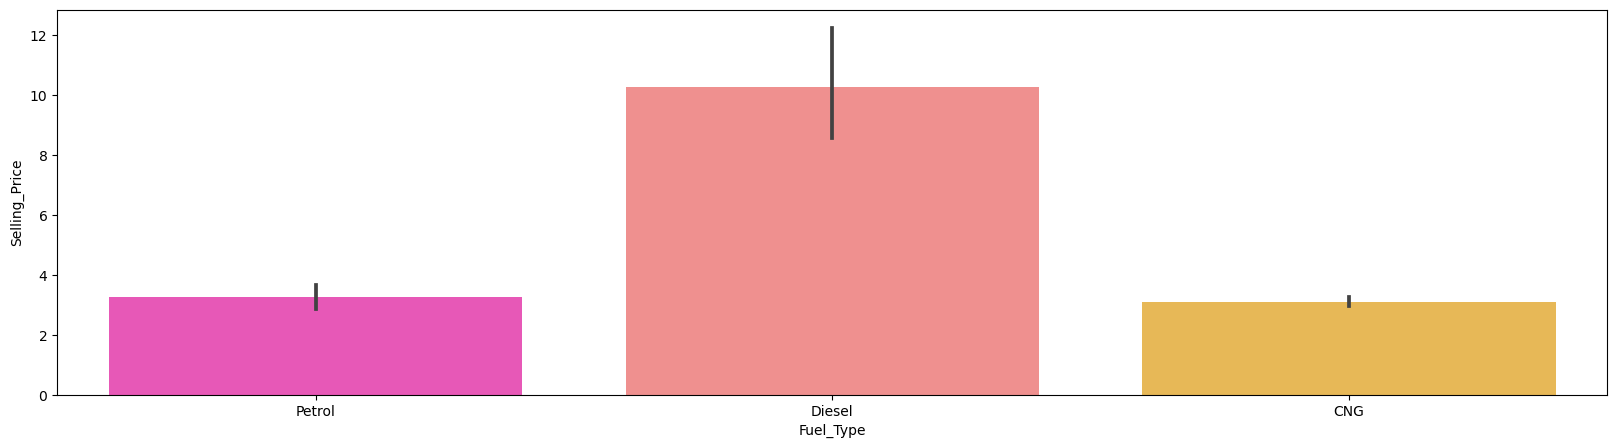

In [13]:
# EDA
plt.figure(figsize=(20,5))
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df,palette='spring')


<Axes: xlabel='Owner', ylabel='Selling_Price'>

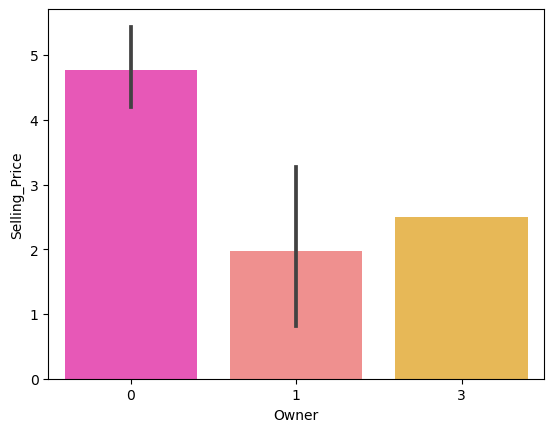

In [14]:
sns.barplot(x='Owner',y='Selling_Price',data=df,palette='spring')

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

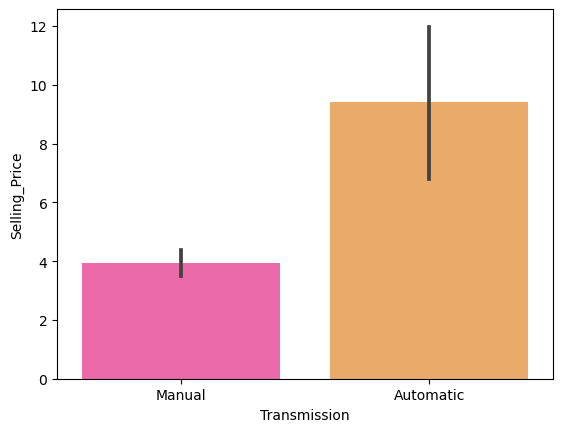

In [15]:
sns.barplot(x='Transmission',y='Selling_Price',data=df,palette='spring')

<Axes: xlabel='Year', ylabel='Selling_Price'>

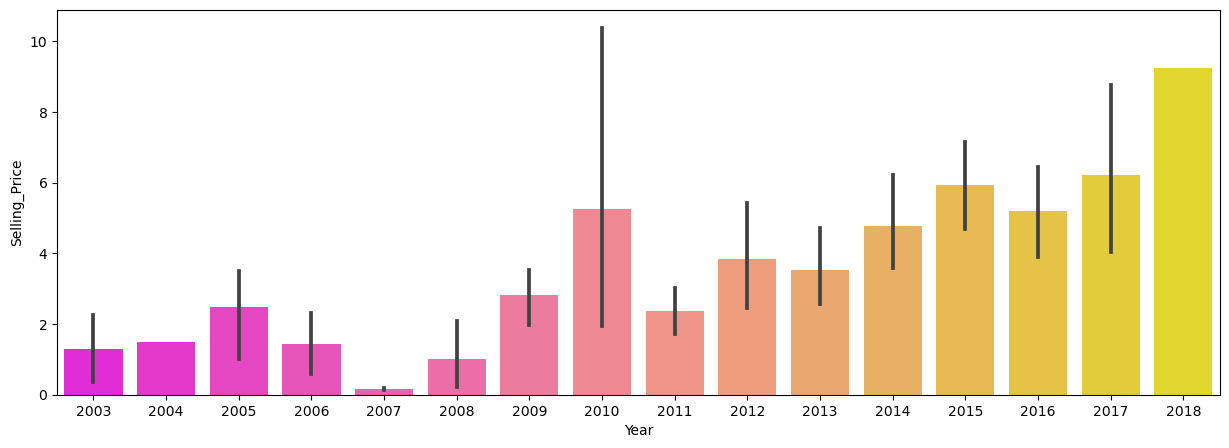

In [16]:
plt.figure(figsize= (15,5))
sns.barplot(x='Year',y='Selling_Price', data= df, palette='spring')


C:\Users\Sheenu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

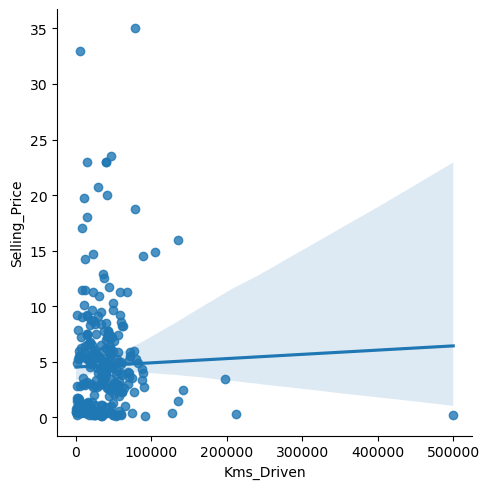

In [17]:
plt.figure(figsize=(15,5))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=df)

In [18]:
# Check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# ok as there is no null values so we dont  need to further chnages for null values

In [19]:
#getting stats of dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
#removing outliers
def outlier_treatment(df):
    # Selecting only numeric columns
    numeric_cols = df.select_dtypes(include='number')
    
    # Calculation of  the first quartile (Q1)
    Q1 = numeric_cols.quantile(0.25)
    
    # Calculation of  the third quartile (Q3)
    Q3 = numeric_cols.quantile(0.75)
    
    # Calculating the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Creating a boolean mask for outlier detection
    outlier_mask = ~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Applying the mask to filter out outliers
    df_rem_out = df[outlier_mask]
    
    return df_rem_out


In [21]:
df = outlier_treatment(df)

In [22]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [36]:
# Function to categorize numerical and categorical columns in the dataset
def data_type(df):
    numerical = []
    categorical = []
    for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(df)
# Function to identify binary columns in the dataset
def binary_columns(df):
    binary_cols  = []
    for col in df.select_dtypes(include=['int','float']).columns:
        unique_values =df[col].unique()
        if np.in1d(unique_values, [0,1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df)
# removing binary coulmn from numerical column
numerical = [i for i in numerical if i not in binary_cols]

            


In [41]:
# Function to encode categorical columns in the dataset
def encoding(df, categorical):
    for i in categorical:
        df[i]= df[i].astype('category')
        df[i] = df[i].cat.codes
    return df
df = encoding(df, categorical)
        

In [42]:
df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,2014,3.35,5.59,27000,2,0,1,0
1,84,2013,4.75,9.54,43000,1,0,1,0
2,61,2017,7.25,9.85,6900,2,0,1,0
3,87,2011,2.85,4.15,5200,2,0,1,0
4,83,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,62,2016,9.50,11.60,33988,1,0,1,0
297,60,2015,4.00,5.90,60000,2,0,1,0
298,62,2009,3.35,11.00,87934,2,0,1,0
299,62,2017,11.50,12.50,9000,1,0,1,0


In [44]:
# Split the dataset into features (X) and target variable (y)
from sklearn.model_selection import train_test_split
X = df.iloc[:, [0, 3, 4, 5, 6, 7,8]].values
y = df.iloc[:, 2].values

In [66]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [100]:
# Apply Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)
lr_pred= lrmodel.predict(X_test)




In [104]:
# regularsization(ridge, lasso and Elasticnet)
# ridge

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)


In [106]:
#lasso
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

In [109]:
#ElasticNet
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)
elasticnet_pred = elasticnet_model.predict(X_test)


In [110]:
def print_results(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")

print_results("Multiple Linear Regression", y_test, lr_pred)
print_results("Ridge Regression", y_test, ridge_pred)
print_results("Lasso Regression", y_test, lasso_pred)
print_results("ElasticNet Regression", y_test, elasticnet_pred)

Multiple Linear Regression - Mean Squared Error: 1.69, R-squared: 0.83
Ridge Regression - Mean Squared Error: 1.71, R-squared: 0.83
Lasso Regression - Mean Squared Error: 2.32, R-squared: 0.77
ElasticNet Regression - Mean Squared Error: 2.29, R-squared: 0.77


In [113]:
# after evalution  of all the model aabove we find multiple and ridge are better model to use for predict the selling price  
# Getting feature importance
def print_feature_importance(model, feature_names):
    feature_importance = pd.Series(model.coef_, index=feature_names).sort_values(ascending=False)
    print("\nFeature Importance:")
    print(feature_importance)

In [121]:
# Print model result
print_feature_importance(lrmodel, ['car_name', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
print_feature_importance(ridge_model, ['car_name', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
print_feature_importance(lasso_model, ['car_name', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
print_feature_importance(elasticnet_model, ['car_name', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])


Feature Importance:
Present_Price    0.440058
car_name         0.004466
Owner            0.000000
Kms_Driven      -0.000047
Transmission    -0.106511
Fuel_Type       -1.222641
Seller_Type     -1.631922
dtype: float64

Feature Importance:
Present_Price    0.446467
car_name         0.006707
Owner            0.000000
Kms_Driven      -0.000046
Transmission    -0.088046
Fuel_Type       -1.176310
Seller_Type     -1.466763
dtype: float64

Feature Importance:
Present_Price    0.440922
car_name         0.034990
Fuel_Type       -0.000000
Seller_Type     -0.000000
Transmission    -0.000000
Owner            0.000000
Kms_Driven      -0.000036
dtype: float64

Feature Importance:
Present_Price    0.456555
car_name         0.034298
Fuel_Type       -0.000000
Seller_Type     -0.000000
Transmission    -0.000000
Owner            0.000000
Kms_Driven      -0.000037
dtype: float64


In [123]:
# Function to print feature importance
def print_sse(model_name, y_true, y_pred):
    sse = np.sum((y_true - y_pred)**2)
    print(f"{model_name} - Sum of Squared Error: {sse:.2f}")

# Printing SSE for each model
print_sse("Multiple Linear Regression", y_test, lr_pred)
print_sse("Ridge Regression", y_test, ridge_pred)
print_sse("Lasso Regression", y_test, lasso_pred)
print_sse("ElasticNet Regression", y_test, elasticnet_pred)

Multiple Linear Regression - Sum of Squared Error: 135.21
Ridge Regression - Sum of Squared Error: 136.50
Lasso Regression - Sum of Squared Error: 185.81
ElasticNet Regression - Sum of Squared Error: 183.30
